In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt

# Multi Armed Bandit Problem

<img src="epsilongreedy.png">

In [2]:
class bandit:
    #Inicialization
    # levers: integer, number of levers
    # real_distribution: list, a list containing the ground truth probability of recieving a reward respectively
    # observed: list, a list containing the observed probability of recieving a reward respectively 
    # observed_size: list, a list of many times has each lever been pulled respectively
    # epsilon: float, a number between 0 and 1.
    # tot_reward: int, historic reward
    def __init__(self, levers, real_distribution, observed, observed_size, epsilon, tot_reward=0):
        self.levers=levers
        self.real_distribution=real_distribution
        self.observed=observed
        self.observed_size=observed_size
        self.epsilon=epsilon
        self.tot_reward=tot_reward
    # Choose the best lever
    def choose_greedy(self):
        index=self.observed.index(max(self.observed))
        return(index)
    
    def observe_reward(self,num_lever):
        reward=np.random.uniform(0,1)<self.real_distribution[num_lever]
        return(reward)
    
    def greedy(self, periods):
        lever=self.choose_greedy()
        reward=0
        for i in range(periods):
            reward=reward+self.observe_reward
        return(reward/periods)
    
    # Choose between exploration or explotation depending of epsilon probability
    def explore_or_exploit(self):
        explore=np.random.uniform(0,1)<self.epsilon
        return(explore)
    
    # The corresponding entry of the observed and observed_size lists are updated
    def update_observed(self, num_lever, reward):
        self.observed[num_lever]=(self.observed[num_lever]*self.observed_size[num_lever]+reward)/(self.observed_size[num_lever]+1)
        self.observed_size[num_lever]=self.observed_size[num_lever]+1
        
    # Epsilon Greedy model
    def choose_e_greedy(self):
        action=self.explore_or_exploit()
        if action:
            which=random.randint(0,(self.levers-1))
            reward=self.observe_reward(which)
            self.tot_reward=self.tot_reward+reward
            self.update_observed(which, reward)
        else:
            which=self.choose_greedy()
            reward=self.observe_reward(which)
            self.tot_reward=self.tot_reward+reward
            self.update_observed(which, reward)
    
    # Simulate N periods of Epsilon-greedy algorithm
    def N_times_e_greedy(self, periods):
        rewards=[]
        observed_history=[]
        for i in range(periods):
            self.choose_e_greedy()
            rewards.append(self.tot_reward)
            observed_history.append(self.observed.copy())
        expected_reward=[rewards[i]/(i+1) for i in range(len(rewards))]
        return(rewards, expected_reward, observed_history)

#### Parameters

In [33]:
num_levers=3 # number of levers.
real=[0.1, 0.2, 0.3] # real distribution of rewards.
obs=[0.5, 0.3, 0.2] # observed distribution of rewards.
size=[12, 15, 18] # number of times each levers is pulled.
eps=0.3 # Probability (trade-off) of exploring instead of exploiting.
tot=0 # Starting reward.
N=10000 # periods of simulation.
k=100 # number of simulations

In [34]:
%%time
# K Simulations of N periods.

history=[]
history_exp=[]
history_obs=[]
for i in range(k):
    test=bandit(levers=num_levers, real_distribution=real, observed=obs, observed_size=size , epsilon=eps, tot_reward=tot)
    vector, vector_exp, observed=test.N_times_e_greedy(N)
    history.append(vector)
    history_exp.append(vector_exp)
    history_obs.append(observed)
    obs=[0.5, 0.3, 0.2] # observed distribution of rewards.
    size=[12, 15, 18] # number of times each levers is pulled.

Wall time: 4.49 s


In [35]:
obs_mean_hist_0=[];obs_mean_hist_1=[];obs_mean_hist_2=[]
obs0=[];obs1=[];obs2=[]
for j in range(N):    
    for i in range(k):    
        obs0.append(history_obs[i][j][0])
        obs1.append(history_obs[i][j][1])
        obs2.append(history_obs[i][j][2])
    obs_mean_hist_0.append(np.mean(obs0))
    obs_mean_hist_1.append(np.mean(obs1))
    obs_mean_hist_2.append(np.mean(obs2))

In [36]:
test.real_distribution

[0.1, 0.2, 0.3]

In [37]:
test.observed

[0.12755598831548204, 0.1987242394504416, 0.29273659207400843]

In [38]:
N

10000

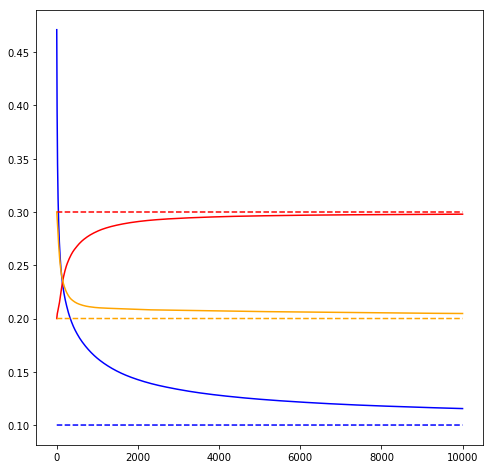

In [39]:
plt.figure(figsize=(8,8))
plt.plot(obs_mean_hist_0, color='blue')
plt.plot((range(N)),[test.real_distribution[0]]*N, color='blue', linestyle='--')
plt.plot(obs_mean_hist_2, color='red')
plt.plot(range(N),[test.real_distribution[2]]*N, color='red', linestyle='--')
plt.plot(obs_mean_hist_1, color='orange')
plt.plot(range(N),[test.real_distribution[1]]*N, color='orange', linestyle='--')

In [40]:
# Computate mean and standard deviation for confidence intervals
def build_mean_CI(list_of_lists):
    means=[]
    std=[]
    for j in range(len(list_of_lists[0])):
        values=[]
        for i in list_of_lists:
            values.append(i[j])
        means.append(np.mean(values))
        std.append(np.std(values))
    return(means, std)

In [41]:
means_exp, std_exp=build_mean_CI(history_exp)
means, std=build_mean_CI(history)

In [141]:
len(means_exp)

1000

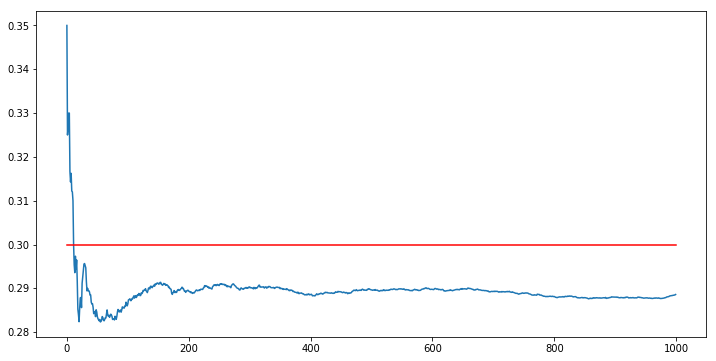

In [42]:
plt.figure(figsize=(12,6))
plt.plot(range(len(means)), means_exp)
plt.plot(range(len(means)), [max(test.real_distribution)]*len(means), color='red')
#plt.plot(range(len(std)), )

In [ ]:
len(history_exp)

In [ ]:
expected_reward=[rewards[i]/(range(len(rewards))[i]+1) for i in range(len(rewards))]

In [ ]:
plt.plot(range(len(rewards)), expected_reward)